In [9]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
tf.__version__

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 80

In [2]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

    
    #----------------------Cropped image------------------------------img_crop--------------------#
def cropped_image(image):
    #print("-> Cropped gray image")
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_crop = img_gray[350:590,260:730]
    return img_crop



def augmentor(name,image, idx, num_image, maxdelta, out_path):

    img = cv2.imread(image, cv2.IMREAD_UNCHANGED) 
    image=cropped_image(img)
    for i in range(num_image):
        
        seed = (i, 0)  # tuple of size (2,)
        
        
        #-----------------Contrast------------------------------------------------------#
        '''
        stateless_random_contrast = tf.image.stateless_random_contrast(image, lower=0.1, upper=0.9, seed=seed)
        visualize(image, stateless_random_contrast)
        print("path to be stored in : ",path +"/"+"contrasted_"+img_name )
        print("New Image inside function Augment : ",type(stateless_random_contrast.numpy()))

        plt.imsave(path +"/"+"contrasted_"+img_name+"_"+str(i)+".png",stateless_random_contrast.numpy())
        '''
        
        #-----------------Brightness------------------------------------------------------#

        image_brightness = tf.image.stateless_random_brightness(image, max_delta=maxdelta, seed=seed)
        cv2.imwrite(out_path+name+str(idx)+"_"+str(i)+".png",image_brightness.numpy())
        '''
        #-----------------Hue------------------------------------------------------#
        seed=(1,i)
        image_hue = tf.image.stateless_random_hue(image, max_delta=0.4, seed=seed)
        plt.imsave(path +"/"+"Hue_"+img_name+"_"+str(i)+".png",image_hue.numpy())
        
        
        #-----------------Saturation------------------------------------------------------#
        seed=(1,i)
        image_saturation = tf.image.stateless_random_saturation(image, 0.5,1.0, seed=seed)
        plt.imsave(path +"/"+"Saturation_"+img_name+"_"+str(i)+".png",image_saturation.numpy())
    
        #-----------------Jpeg__quality------------------------------------------------------#
        seed=(1,i)
        img_jpeg=tf.cast(image,tf.uint8)
        image_jpeg = tf.image.stateless_random_jpeg_quality(img_jpeg, 60, 95, seed=seed)
        plt.imsave(path +"/"+"Jpeg_"+img_name+"_"+str(i)+".png",image_jpeg.numpy())
        '''
        if i > 1:
            break
        
def generator(name,naccept_gen,target_path):
    loaf = [raw_dir+name+"/"+i  for i in os.listdir(raw_dir+name+"/")]
    opath = target_path+name+"/"
    if not os.path.exists(opath):
            os.makedirs(opath)
    for c,im in enumerate(loaf):
        augmentor(name,im,c,naccept_gen,0.2,opath)
        if c > 5:
            break
            
def generatorbin(name,naccept_gen,opath):
    loaf = [raw_dir+name+"/"+i  for i in os.listdir(raw_dir+name+"/")]
    #opath = target_path+name+"/"
    if not os.path.exists(opath):
            os.makedirs(opath)
    for c,im in enumerate(loaf):
        augmentor(name,im,c,naccept_gen,0.2,opath)
        if c > 5:
            break

In [3]:
import glob
raw_dir='/grid_mnt/data__data.polcms/cms/sghosh/camdata/HGCROC_image_dataset/'

folder_names= os.listdir(raw_dir)
print("Folder Names : ",folder_names)

rawaccept = len(os.listdir(raw_dir+'Acceptable'))
print("total acceptable raw images",rawaccept)

Folder Names :  ['Acceptable', 'Empty', 'Flipped', 'Mispositionned', 'Turned_180', 'One_on_top_of_another']
total acceptable raw images 258


In [7]:
### for n class classification #####
total_accept = 30000


##### generate acceptable files #######
naccept_gen = 30000//rawaccept
print("copies from each original image:",naccept_gen)
target_path='/grid_mnt/data__data.polcms/cms/sghosh/camdata/Augmented_dataset_1/'
if not os.path.exists(target_path):
        os.makedirs(target_path)

catname = "Acceptable"
generator(catname,naccept_gen,target_path)



##### generate other class files #######
nonacpt = [i  for i in folder_names if "Acceptable" not in  i]
print("other class names:",nonacpt)
spercateg = total_accept#//len(nonacpt)
print("samples to generate per category:",spercateg)


for cat in nonacpt:
    nraw = len(os.listdir(raw_dir+cat))
    print("generating for category:",cat," with noriginal files:",nraw)
    ncat_gen = spercateg//nraw
    generator(cat,ncat_gen,target_path)

copies from each original image: 116
other class names: ['Empty', 'Flipped', 'Mispositionned', 'Turned_180', 'One_on_top_of_another']
samples to generate per category: 30000
generating for category: Empty  with noriginal files: 264
generating for category: Flipped  with noriginal files: 264
generating for category: Mispositionned  with noriginal files: 262
generating for category: Turned_180  with noriginal files: 262
generating for category: One_on_top_of_another  with noriginal files: 132


In [8]:
### for binary classification #####
total_accept = 30000

##### generate acceptable files #######
naccept_gen = 30000//rawaccept
print("copies from each original image:",naccept_gen)
target_path='/grid_mnt/data__data.polcms/cms/sghosh/camdata/Augmented_dataset_bin/'
if not os.path.exists(target_path):
        os.makedirs(target_path)

catname = "Acceptable"
generator(catname,naccept_gen,target_path)


##### generate other class files #######
nonacpt = [i  for i in folder_names if "Acceptable" not in  i]
print("other class names:",nonacpt)
spercateg = total_accept//len(nonacpt)
print("samples to generate per category:",spercateg)

opath = target_path+"Nonacceptable/"
for cat in nonacpt:
    nraw = len(os.listdir(raw_dir+cat))
    print("generating for category:",cat," with noriginal files:",nraw)
    ncat_gen = spercateg//nraw
    generatorbin(cat,ncat_gen,opath)

copies from each original image: 116
other class names: ['Empty', 'Flipped', 'Mispositionned', 'Turned_180', 'One_on_top_of_another']
samples to generate per category: 6000
generating for category: Empty  with noriginal files: 264
generating for category: Flipped  with noriginal files: 264
generating for category: Mispositionned  with noriginal files: 262
generating for category: Turned_180  with noriginal files: 262
generating for category: One_on_top_of_another  with noriginal files: 132


/grid_mnt/data__data.polcms/cms/sghosh/camdata/HGCROC_image_dataset/Acceptable/Image_test1,1 (2).png
(720, 1024, 3)
(240, 470)
(240, 470)
(240, 470)
(240, 470)
(100, 180)
(100, 180)
show all images===============>
/grid_mnt/data__data.polcms/cms/sghosh/camdata/HGCROC_image_dataset/Acceptable/Image_test1,1.png
(720, 1024, 3)
(240, 470)
(240, 470)
(240, 470)
(240, 470)
(100, 180)
(100, 180)
show all images===============>
/grid_mnt/data__data.polcms/cms/sghosh/camdata/HGCROC_image_dataset/Acceptable/Image_test1,2 (2).png
(720, 1024, 3)
(240, 470)
(240, 470)
(240, 470)
(240, 470)
(100, 180)
(100, 180)
show all images===============>
/grid_mnt/data__data.polcms/cms/sghosh/camdata/HGCROC_image_dataset/Acceptable/Image_test1,2.png
(720, 1024, 3)
(240, 470)
(240, 470)
(240, 470)
(240, 470)
(100, 180)
(100, 180)
show all images===============>
/grid_mnt/data__data.polcms/cms/sghosh/camdata/HGCROC_image_dataset/Acceptable/Image_test1,3 (2).png
(720, 1024, 3)
(240, 470)
(240, 470)
(240, 470)
(24

<Figure size 720x720 with 0 Axes>

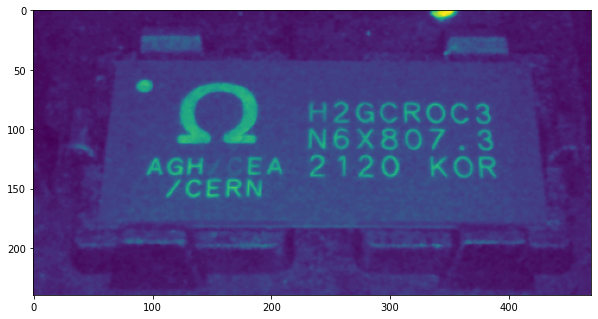

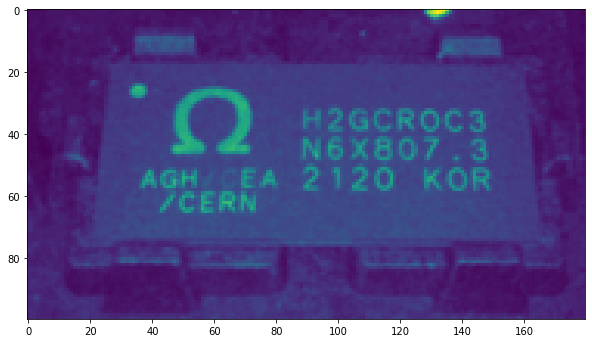

<Figure size 720x720 with 0 Axes>

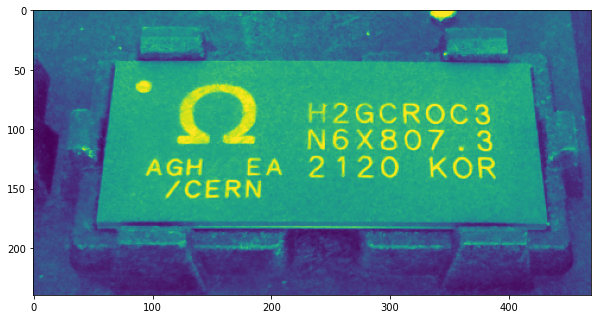

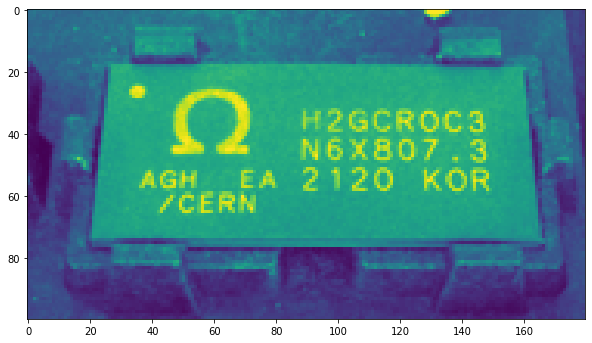

<Figure size 720x720 with 0 Axes>

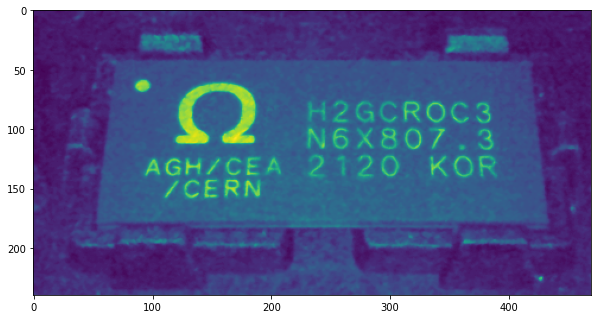

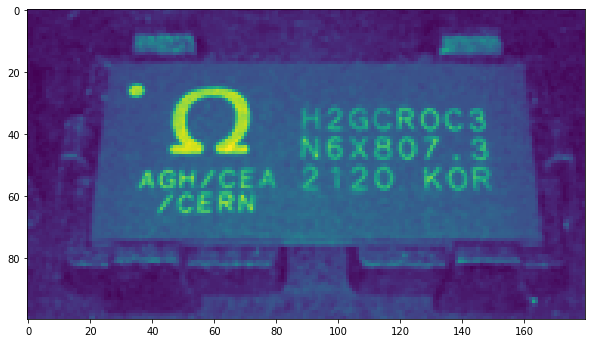

<Figure size 720x720 with 0 Axes>

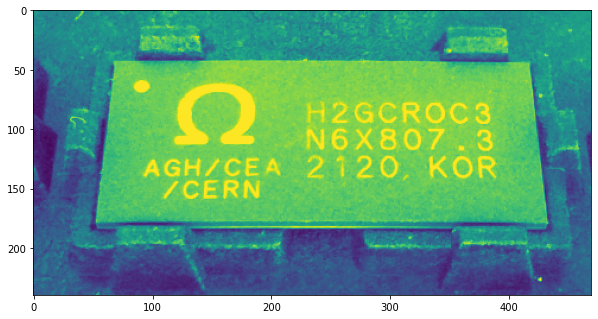

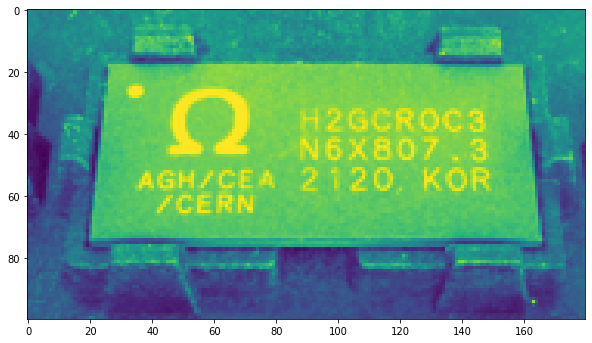

<Figure size 720x720 with 0 Axes>

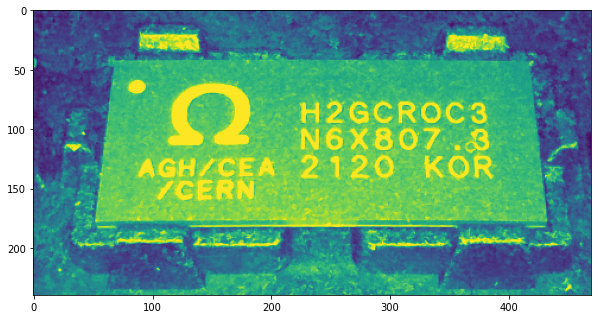

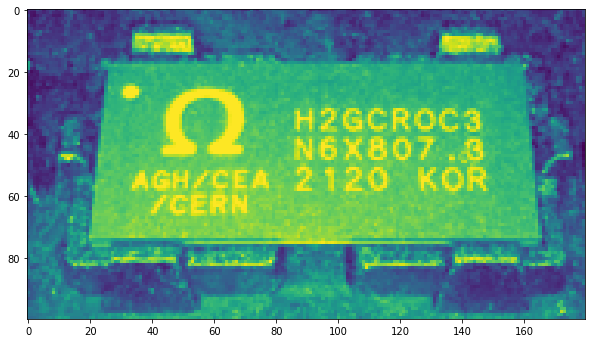

In [61]:
# Read the original image
import PIL
%matplotlib inline
#cname = 
#test_dir = opath = target_path+cname+"/"

#test_dir = '/grid_mnt/data__data.polcms/cms/sghosh/camdata/Augmented_dataset_bin/Acceptable/'
test_dir = '/grid_mnt/data__data.polcms/cms/sghosh/camdata/HGCROC_image_dataset/Acceptable/'
lof = os.listdir(test_dir)
for i in range(len(lof)):
    print(test_dir+lof[i])
    plt.figure(figsize = (10,10))
    
    img = cv2.imread(test_dir+lof[i], cv2.IMREAD_UNCHANGED)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_crop = img_gray[350:590,260:730]
    print(img.shape)
    print(img_crop.shape)
    image_brightness = tf.image.stateless_random_brightness(img_crop, max_delta=0.12, seed=(123,1))
    print(image_brightness.shape)
    cv2.imwrite("test.png",image_brightness.numpy())
    #plt.imsave("test.png",image_brightness.numpy())
    print(image_brightness.shape)
    img2 = PIL.Image.open("test.png")#, cv2.IMREAD_UNCHANGED)
    #print(np.asarray(img2).shape)
    #img2 = cv2.imread("test.png", cv2.IMREAD_UNCHANGED)
    print(np.array(img2).shape)
    #plt.imshow(img2)
    
    size = 180,100

    img_resize=img2.resize(size)
    print(np.array(img_resize).shape)
    print(np.asarray(img_resize).shape)
    print("show all images===============>")
    plt.figure(figsize = (10,10))
    plt.imshow(img2)
    plt.figure(figsize = (10,10))
    plt.imshow(img_resize)
    
    if i > 3:
        break